<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

display(y_train.shape, y_test.shape)

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)


(8982,)

(2246,)

In [4]:
# Max Number of Embeddings = max word id
X_train.max()

30978

In [5]:
# Looking at y
display(y_train[0:5])

array([19, 41, 16,  3,  4])

In [6]:
# For sparse categorical cross_entropy loss, need y to be one-hot encoded
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

y_train_oh = encoder.fit_transform(y_train.reshape(-1,1)).todense()
y_test_oh = encoder.transform(y_test.reshape(-1,1)).todense()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
# Can't one-hot. Too big.  Trying to scale y
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y_train_sc = scaler.fit_transform(y_train.reshape(-1,1))
y_test_sc = scaler.transform(y_test.reshape(-1,1))

In [11]:
# Define Model

# Some parameters to play around with
batch_size = 1000
num_classes = 1


print('Build model...')
model = Sequential()
model.add(Embedding(32000, 500))
model.add(LSTM(500))
model.add(Dense(3, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

Build model...


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 500)         16000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               2002000   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 18,003,507
Trainable params: 18,003,507
Non-trainable params: 0
_________________________________________________________________


In [14]:
# You should only run this cell once your model has been properly configured

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train_sc,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test_sc))
# score, acc = model.evaluate(X_test, y_test_sc,
#                             batch_size=batch_size)
# print('Test score:', score)
# print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
8982/8982 [==============================] - 19s 2ms/sample - loss: 0.0807 - accuracy: 0.0061 - val_loss: 0.0791 - val_accuracy: 0.0053


In [ ]:
# About as useless as it gets

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Pad sequences creates input sequences of given length.  This is important as the the first layer expects inputs of a given size. It can truncate data, though, so care must be used in X_train prior.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Long short term memory networks are able to maintain effects of adjustments through longer input sequences.  Otherwise, the RNN will radically alter weights when a new input sequence arrives.  This makes it very unlikely the network will learn relationships between say ten words and the next in line.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

RNN's are used in:
> Text and Audio predictions

> Speech recognition

> Generative Models

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [15]:
!pip install google_images_download

     |████████████████████████████████| 911kB 15.6MB/s eta 0:00:01
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=16275 sha256=7acc31ef77738f79adf02c6eb9ab569f6f7abb4c4a6dad1f40c37074ea3b9d4c
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "", "limit": 100, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: http://brookesitton.weebly.com/uploads/5/5/3/4/55348493/5415787_orig.gif
URLError on an image...trying next one... Err

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [7]:
# You've got something to do in this cell. ;)

import numpy as np
import sys
from PIL import Image
sys.modules['Image'] = Image 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions



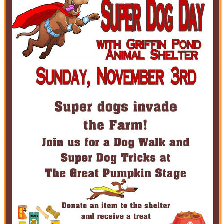

In [8]:
# Fix Image Paths
import os


absolute_image_paths = ['downloads/animal pond/'+path for path in os.listdir('downloads/animal pond') if 'jpg' in path]

# image.load_img(absolute_image_paths[0])

process_img_path(absolute_image_paths[0])

In [68]:
# Define base model so it doesn't get instantiated every time a prediction is made
import re


base_model = ResNet50(include_top=True, weights='imagenet')

def find_frogs(decoded_array):
    inner_list = decoded_array[0]
    for item in inner_list:
#         print(item)
        frog_mentions = re.findall("frog", item[1])
        if len(frog_mentions) > 0:
            return True
    return False


def process_img_path(img_path):
    im = image.load_img(img_path, target_size=(224,224))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    processed_input = preprocess_input(im)
    return processed_input


def img_contains_frog(processed_img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path` function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Generate Prediction and decode
    raw_predictions = base_model.predict(processed_img)
    decoded_predictions = decode_predictions(raw_predictions, top=20)
    
    # Find Frogs
    
            
    return find_frogs(decoded_predictions)

In [69]:
img_contains_frog(
    process_img_path(absolute_image_paths[0])
)


False

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [70]:
import matplotlib.pyplot as plt

def display_predictions(paths):
    image_data = []
    frogs = []
    for path in paths:
        x = process_img_path(path)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


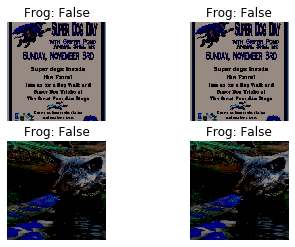

In [71]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths)

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

Autoencoders seem to be useful in creating novel noise filtering tools.  They don't seem to be particularly useful for generating data.  They may also be employed to find similar objects in a dataset where the prediction probabilities can be sorted from an input and interpreted as many things like the think that came in.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
Certainly not math.  That is going to need to change.  Probably business decisions and structuring for data capture as well as understanding a bit about ML engineering.

- What area of Data Science would you most like to learn more about, and why?
I would like to know more about ML engineering.  Deploying models, updating them, maintaining them in streaming context, batch jobs, and more.  I'd also like to better understand how some of the modeling libraries work under the hood, especially on the input layers and sequence reasoning.

- Where do you think Data Science will be in 5 years?
I think AutoML will become more and more functional for answering common business decisions.  When that happens, a shift in enterprise data management and collection will likely ensue as platforms teach CTOs and marketing managers what standard data, types, and availability are needed to run tools.  I believe the platform-agnostic data collection standards will lead to a jump in importance to data engineers and pre-packaged data collection systems with AI powered dashboards (think Wordpress plugins). I don't think any massive breakthroughs in generative AI will occur.  I think personal health applications will begin to roll out and better lifestyle/business decision-making will start to create inequity between believers in the systems and non-believers.

- What are the threats posed by AI to our society?
Displacement, insecurity, and misuse are my top 3 with the latter being the biggy.  Generally, increases in productivity at home lead to economic prosperity, I think.  So firms doing more work here (even if it displaces people) will probably be a good thing.  I think construction robotics are still about 10 years away, but autonomous driving could create a massive jump in unemployment as fleets roll out replacements for human drivers. So far as misuse, I am worried that interpretation of model outputs is still not well understood (not even buy some practitioners).  Care must be taken and a different frame of mind for probabilistic interpretations is required.  Authoritarianism doesn't work when the model constantly gives you top 3 choices.  A kind of limited scope captialism may need to be employed.

- How do you think we can counteract those threats? 
I think it is going to be up to the AI/ML community to create standards for interpretation as models become more used in various aspects of life.  I think pusing towards model udnerstanding and transparency is also a good thing, building tools that can help interpret the learning process at the layer-weight level.

- Do you think achieving General Artifical Intelligence is ever possible?
I think hyper-intelligence is possible.  I don't know enough about the universe, reasoning, or knowledge representation to be sure that a general learning machine will work across all domains.  It sounds plausible, but we'll see.


## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")